In [21]:
import datetime
import pandas as pd
from snownlp import SnowNLP


def calculate_sentiment_score(text):
    """
    计算文本的情感得分
    :param text: 文本内容
    :return: 情感得分
    """
    words = text.split()
    sentiment_sum = sum(SnowNLP(word).sentiments for word in words)
    return sentiment_sum / len(words) if words else 0


def read_csv_file(file_path):
    """
    读取 CSV 文件
    :param file_path: 文件路径
    :return: 读取后的数据框
    """
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print('文件未找到，请检查文件路径是否正确。')
        exit()


def save_data_to_excel(df, file_path):
    """
    将数据框保存到 Excel 文件
    :param df: 数据框
    :param file_path: 文件路径
    """
    try:
        df.to_excel(file_path, header=True)
    except PermissionError:
        print('没有写入文件的权限，请检查文件路径和权限设置。')
    except Exception as e:
        print(f'发生错误: {e}')


def main():
    # 标注自己的学号、姓名
    me = 'by [22251109115] [严秋实]'

    # 1. 读入 CSV 档
    print('1. 读入包含文本和类别的 CSV 档' + me)
    print('开始时间：' + str(datetime.datetime.now()))
    data_df = read_csv_file('./output_withdanmaku_csv.csv')

    # 自动确定 categories（通过统计数据中所有唯一的类别值）
    unique_categories = data_df['分区'].unique()
    categories = {category: data_df['分区'].tolist().count(category) for category in unique_categories}

    err = data_df['所有评论和弹幕'].apply(lambda x: len(str(x)) < 10).sum()

    print('')
    print(categories)
    print(f'数据数量：{len(data_df)}，异常数据数量：{err}，结束时间：{str(datetime.datetime.now())}')

    data_df['情感正向概率'] = ''
    data_df['情感归类1'] = ''
    data_df['情感归类2'] = ''
    data_df['分析用内容'] = ''

    # 2. 计算每一则文本的情感平均分数 (情感正向概率)
    print('2. 计算每一则文本的情感正向概率，并统计' + me)
    print('开始时间：' + str(datetime.datetime.now()))
    data_df['情感正向概率'] = data_df['所有评论和弹幕'].apply(calculate_sentiment_score)

    sentiment_max = data_df['情感正向概率'].max()
    sentiment_min = data_df['情感正向概率'].min()

    print('')
    print(f'情感分析数量：{len(data_df)}')
    print(f'情感最高分数：{sentiment_max}')
    print(f'情感最低分数：{sentiment_min}')

    # 3. 依据情感得分从 0 - 1 平均分成五类进行情感归类并作交叉分析表
    def classify_sentiment_by_method1(score):
        if score < 0.2:
            return '1.极端负面'
        elif score < 0.4:
            return '2.偏向负面'
        elif score < 0.6:
            return '3.情感中性'
        elif score < 0.8:
            return '4.偏向正面'
        else:
            return '5.极端正面'

    print('3. 依据算法一(情感得分从 0 - 1 平均分成五类)，作成交叉分析表' + me)
    print('开始时间：' + str(datetime.datetime.now()))
    data_df['情感归类1'] = data_df['情感正向概率'].apply(classify_sentiment_by_method1)
    print(pd.crosstab(data_df['情感归类1'], data_df['分区'], margins=True, margins_name='合计'))

    # 4. 依据算法二(情感得分最大到最小平均分成五类进行情感归类
    def classify_sentiment_by_method2(score, min_score, max_score):
        sentiment_range = max_score - min_score
        sentiment_piece = sentiment_range / 5
        if score < min_score + sentiment_piece:
            return '1.极端负面'
        elif score < min_score + sentiment_piece * 2:
            return '2.偏向负面'
        elif score < min_score + sentiment_piece * 3:
            return '3.情感中性'
        elif score < min_score + sentiment_piece * 4:
            return '4.偏向正面'
        else:
            return '5.极端正面'

    print('4. 依据算法二(情感得分最大到最小平均分成五类)归类' + me)
    print('开始时间：' + str(datetime.datetime.now()))
    data_df['情感归类2'] = data_df.apply(
        lambda row: classify_sentiment_by_method2(row['情感正向概率'], sentiment_min, sentiment_max), axis=1)
    data_df['分析用内容'] = data_df['所有评论和弹幕']

    # 5. 依据算法二(情感得分最大到最小平均分成五类)，作成交叉分析表
    print('5. 依据算法二(情感得分最大到最小平均分成五类)，作成交叉分析表' + me)
    print('开始时间：' + str(datetime.datetime.now()))
    print(pd.crosstab(data_df['情感归类2'], data_df['分区'], margins=True, margins_name='合计'))

    # 6. 将情感分析后的 DataFrame 存入 Excel 档
    # print('6. 将情感分析后的 DataFrame 存入 Excel 档' + me)
    # print('开始时间：' + str(datetime.datetime.now()))
    # save_data_to_excel(data_df, './sentiment_analyzed_file.xlsx')
    # print('结束时间：' + str(datetime.datetime.now()))


if __name__ == "__main__":
    main()

1. 读入包含文本和类别的 CSV 档by [22251109115] [严秋实]
开始时间：2024-12-30 17:28:27.693488

{'douga': 20, 'music': 20, 'dance': 20, 'game': 20, 'knowledge': 20, 'tech': 20, 'sports': 20, 'car': 20, 'life': 20, 'food': 20, 'animal': 20, 'kichiku': 20, 'fashion': 20, 'ent': 20, 'cinephile': 20}
数据数量：300，异常数据数量：0，结束时间：2024-12-30 17:28:27.858270
2. 计算每一则文本的情感正向概率，并统计by [22251109115] [严秋实]
开始时间：2024-12-30 17:28:27.858719

情感分析数量：300
情感最高分数：0.738824181210551
情感最低分数：0.45784763263341355
3. 依据算法一(情感得分从 0 - 1 平均分成五类)，作成交叉分析表by [22251109115] [严秋实]
开始时间：2024-12-30 17:31:22.013207
分区      animal  car  cinephile  dance  douga  ent  fashion  food  game  \
情感归类1                                                                    
3.情感中性      19   20         19     19     17   18       18    20    19   
4.偏向正面       1    0          1      1      3    2        2     0     1   
合计          20   20         20     20     20   20       20    20    20   

分区      kichiku  knowledge  life  music  sports  tech   合计  
情感归类1     

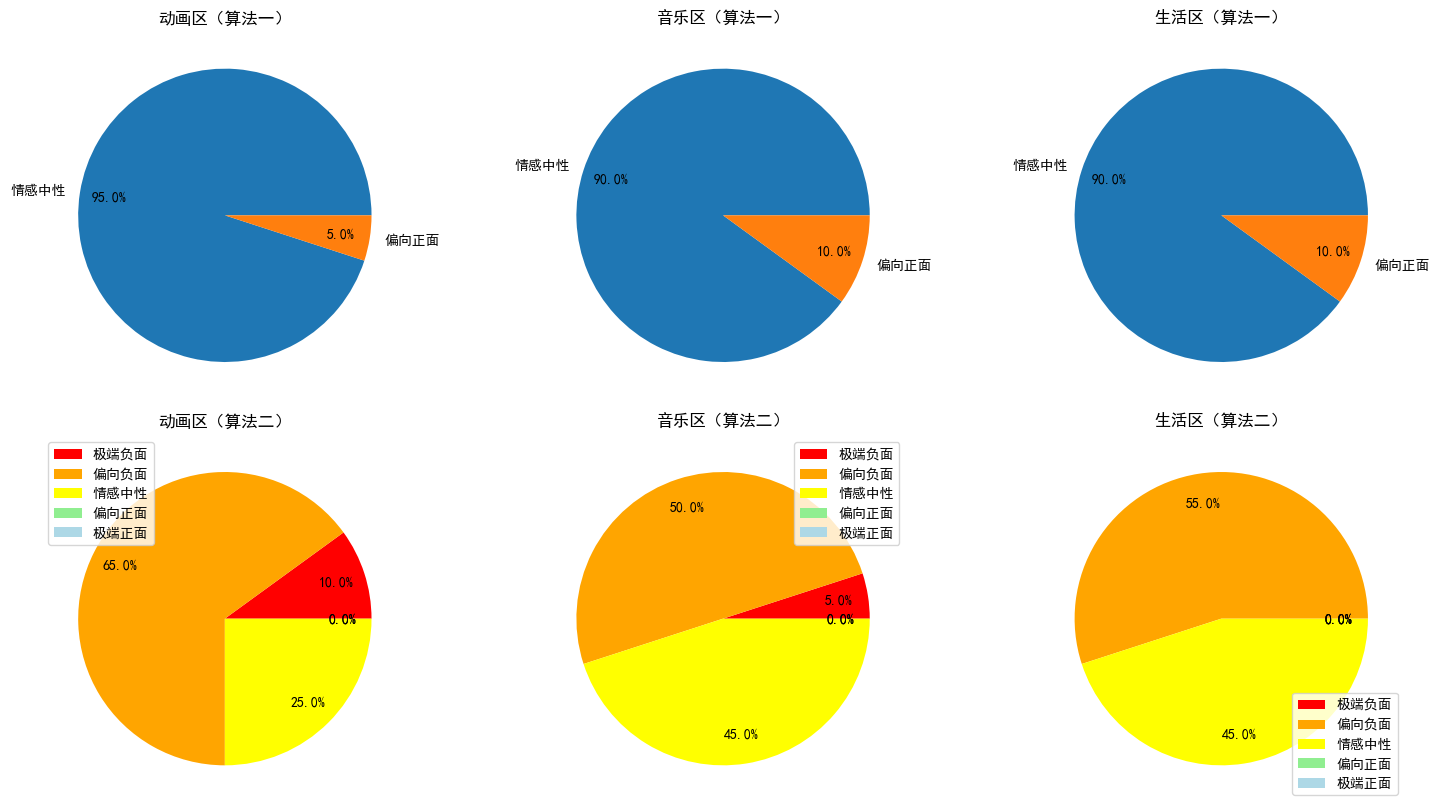

In [87]:
import matplotlib.pyplot as plt


# 算法一情感中性和偏向正面的比例（以动画、音乐、生活区为例）
algorithm_one_animation_neutral = 19 / 20
algorithm_one_animation_positive = 1 / 20
algorithm_one_music_neutral = 18 / 20
algorithm_one_music_positive = 2 / 20
algorithm_one_life_neutral = 18 / 20
algorithm_one_life_positive = 2 / 20

# 算法二各类情感的比例（以动画、音乐、生活区为例）
algorithm_two_animation_extreme_negative = 2 / 20
algorithm_two_animation_negative = 13 / 20
algorithm_two_animation_neutral = 5 / 20
algorithm_two_animation_positive = 0 / 20
algorithm_two_animation_extreme_positive = 0 / 20
algorithm_two_music_extreme_negative = 1 / 20
algorithm_two_music_negative = 10 / 20
algorithm_two_music_neutral = 9 / 20
algorithm_two_music_positive = 0 / 20
algorithm_two_music_extreme_positive = 0 / 20
algorithm_two_life_extreme_negative = 0 / 20
algorithm_two_life_negative = 11 / 20
algorithm_two_life_neutral = 9 / 20
algorithm_two_life_positive = 0 / 20
algorithm_two_life_extreme_positive = 0 / 20


# 绘制算法一的饼图
labels_algorithm_one = ['情感中性', '偏向正面']
sizes_algorithm_one_animation = [algorithm_one_animation_neutral, algorithm_one_animation_positive]
sizes_algorithm_one_music = [algorithm_one_music_neutral, algorithm_one_music_positive]
sizes_algorithm_one_life = [algorithm_one_life_neutral, algorithm_one_life_positive]

# 创建 2 行 3 列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# 绘制算法一的饼图并调整标签和百分比的距离
axs[0, 0].pie(sizes_algorithm_one_animation, autopct='%1.1f%%', labels=labels_algorithm_one, pctdistance=0.8, labeldistance=1.1)
axs[0, 0].set_title('动画区（算法一）')


axs[0, 1].pie(sizes_algorithm_one_music, autopct='%1.1f%%', labels=labels_algorithm_one, pctdistance=0.8, labeldistance=1.1)
axs[0, 1].set_title('音乐区（算法一）')


axs[0, 2].pie(sizes_algorithm_one_life, autopct='%1.1f%%', labels=labels_algorithm_one, pctdistance=0.8, labeldistance=1.1)
axs[0, 2].set_title('生活区（算法一）')


# 绘制算法二的饼图
labels_algorithm_two = ['极端负面', '偏向负面', '情感中性', '偏向正面', '极端正面']
sizes_algorithm_two_animation = [algorithm_two_animation_extreme_negative, algorithm_two_animation_negative,
                             algorithm_two_animation_neutral, algorithm_two_animation_positive,
                             algorithm_two_animation_extreme_positive]
sizes_algorithm_two_music = [algorithm_two_music_extreme_negative, algorithm_two_music_negative,
                          algorithm_two_music_neutral, algorithm_two_music_positive,
                          algorithm_two_music_extreme_positive]
sizes_algorithm_two_life = [algorithm_two_life_extreme_negative, algorithm_two_life_negative,
                         algorithm_two_life_neutral, algorithm_two_life_positive,
                         algorithm_two_life_extreme_positive]


# 绘制算法二的饼图并使用 legend 代替 labels
axs[1, 0].pie(sizes_algorithm_two_animation, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
             colors=['red', 'orange', 'yellow', 'lightgreen', 'lightblue'])
axs[1, 0].set_title('动画区（算法二）')
axs[1, 0].legend(labels_algorithm_two, loc='best')


axs[1, 1].pie(sizes_algorithm_two_music, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
             colors=['red', 'orange', 'yellow', 'lightgreen', 'lightblue'])
axs[1, 1].set_title('音乐区（算法二）')
axs[1, 1].legend(labels_algorithm_two, loc='best')


axs[1, 2].pie(sizes_algorithm_two_life, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
             colors=['red', 'orange', 'yellow', 'lightgreen', 'lightblue'])
axs[1, 2].set_title('生活区（算法二）')
axs[1, 2].legend(labels_algorithm_two, loc='best')


# 调整子图之间的间距
plt.subplots_adjust(wspace=-0.1, hspace=0.1)


plt.show()